In [ ]:
install.packages('dplyr')
library(dplyr)
install.packages('ggplot2')
library(ggplot2)
install.packages('tibble')
library(tibble)
install.packages('lubridate')
library(lubridate)
install.packages('fpp3')
library(fpp3)
install.packages('forecast')
library(forecast)
install.packages('fable')
library(fable)
install.packages('tsibble')
library(tsibble)
install.packages('feasts')
library(feasts)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(AirPassengers)
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [ ]:
air_t <- tibble(AirPassengers)
head(air_t, 6)

AirPassengers
<dbl>
112
118
132
129
121
135


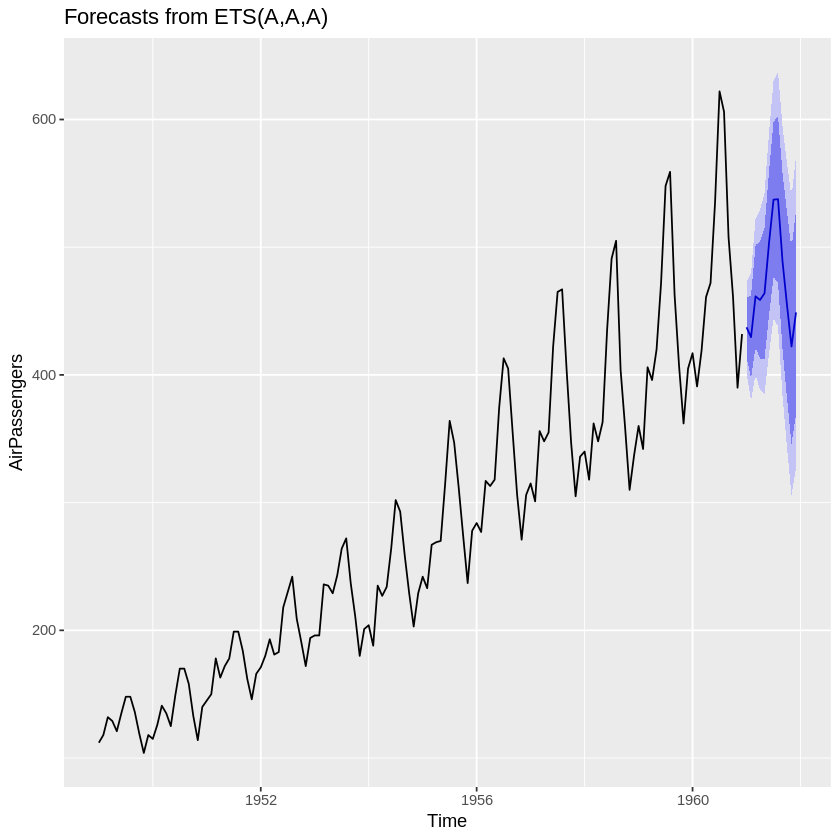

In [ ]:
holtwinter_model <- ets(AirPassengers, model="AAA") %>% forecast(h=12)
autoplot(holtwinter_model)

In [ ]:
AirPassengers_ts <- as_tsibble(AirPassengers, index= "Month")
head(AirPassengers_ts)

index,value
<mth>,<dbl>
1949 Jan,112
1949 Feb,118
1949 Mar,132
1949 Apr,129
1949 May,121
1949 Jun,135


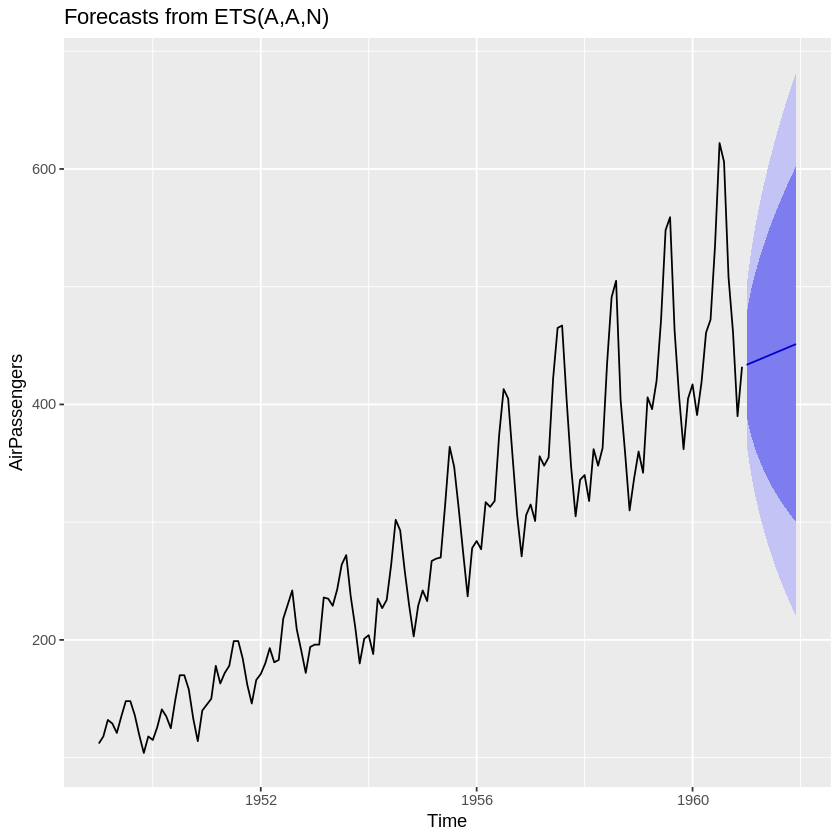

In [ ]:
holt_model1 <- ets(AirPassengers, model = "AAN") %>% forecast(h=12)
autoplot(holt_model1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

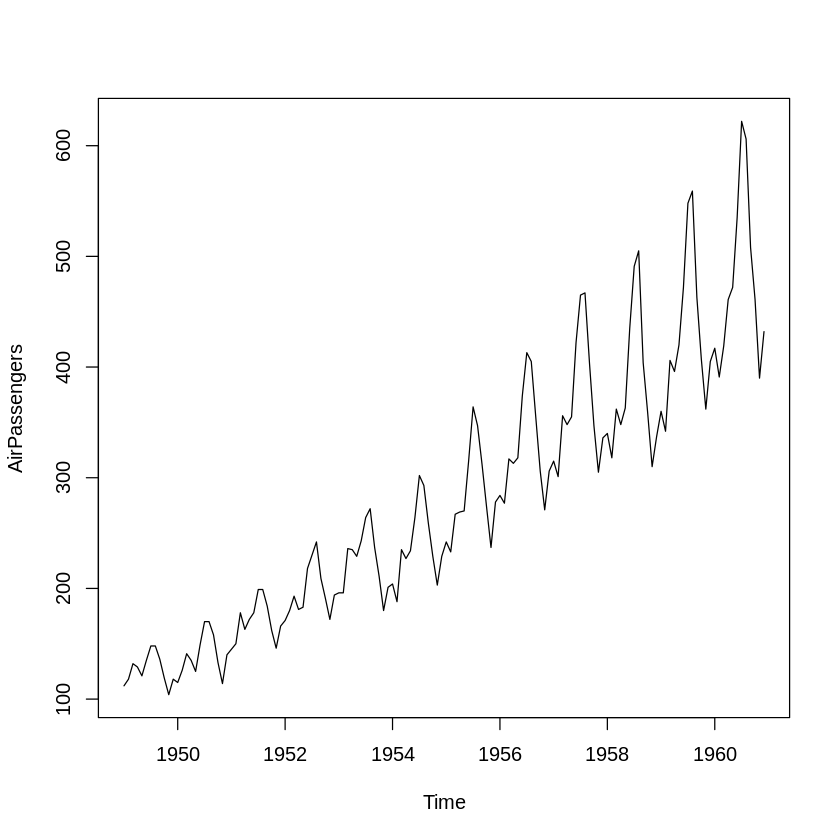

In [ ]:
plot(AirPassengers)
summary(AirPassengers)

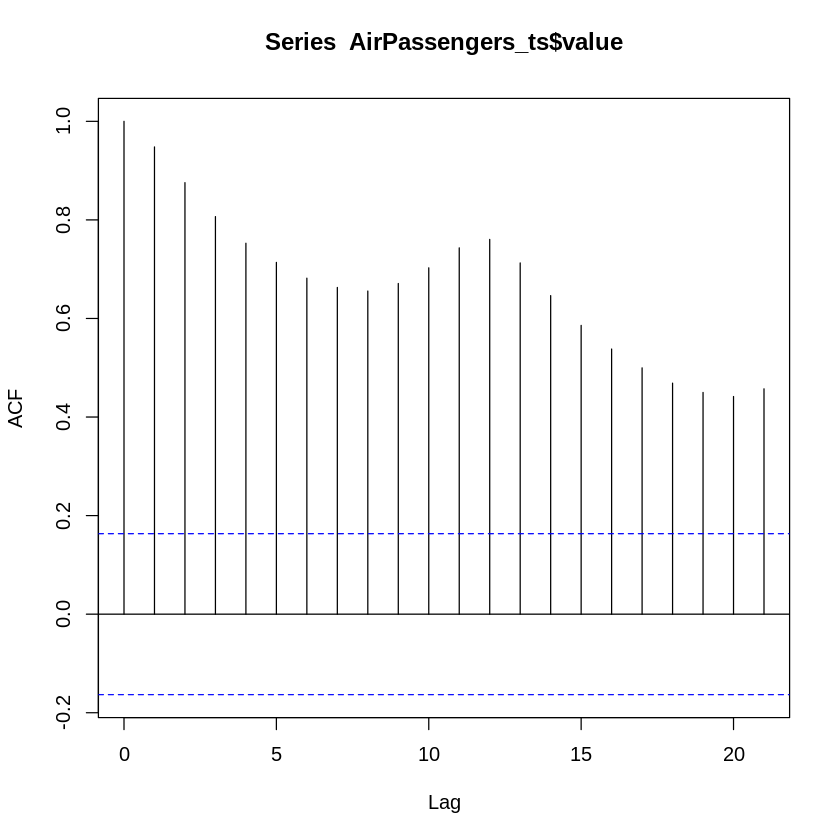

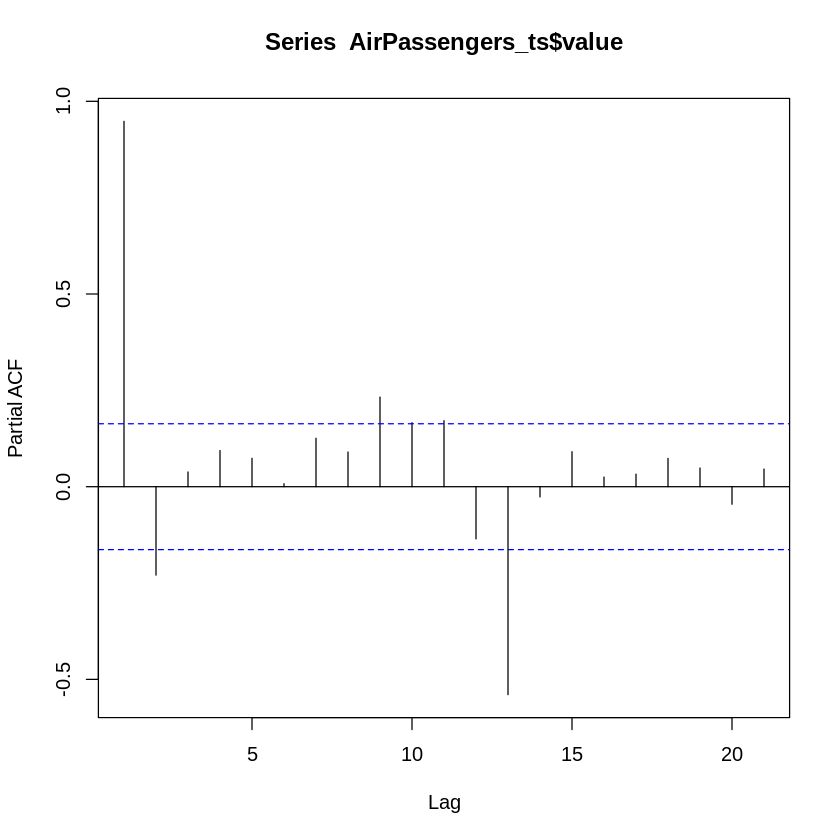

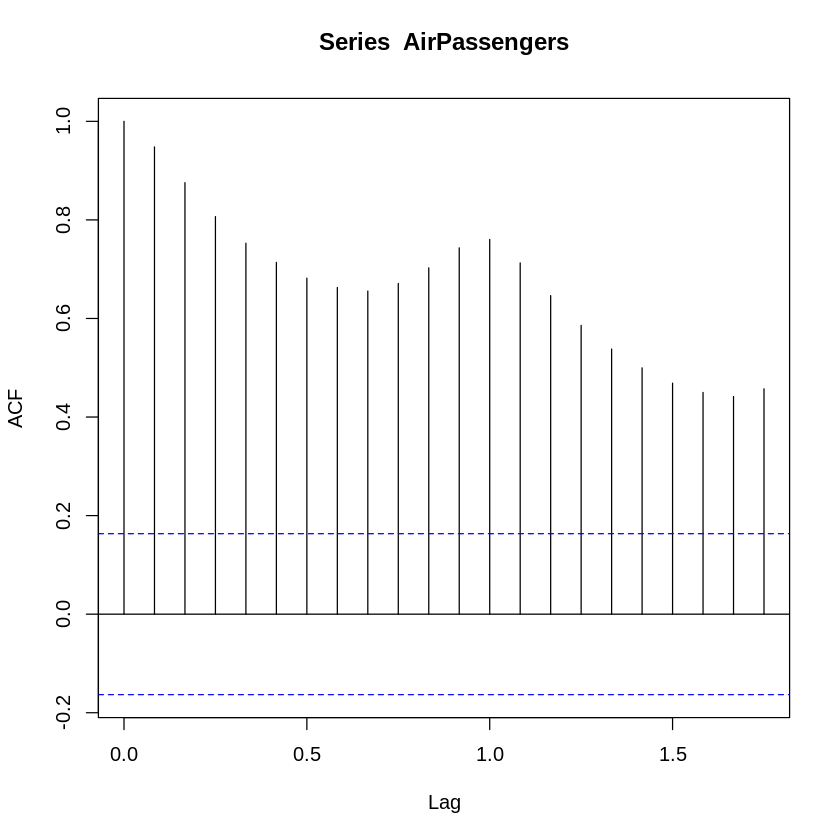

In [ ]:
acf_model <- acf(AirPassengers_ts$value)
pacf_model <- pacf(AirPassengers_ts$value)


In [ ]:
naive_model <- model(NAIVE(AirPassengers_ts$value))


ERROR: Error in UseMethod("model"): no applicable method for 'model' applied to an object of class "c('mdl_defn', 'R6')"


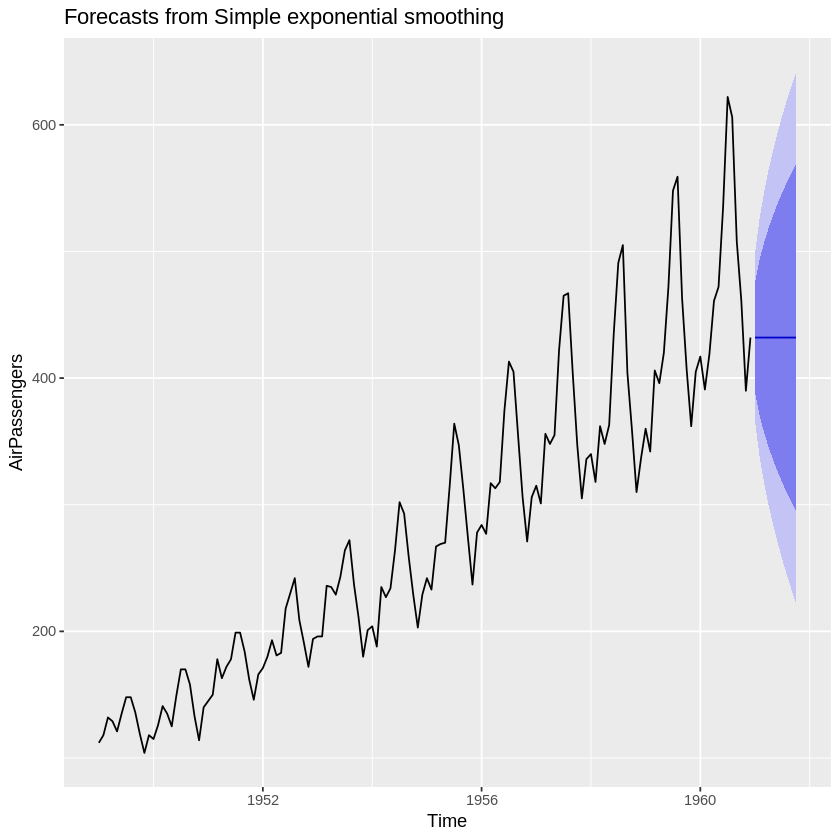

In [ ]:
ses_model <- ses(AirPassengers)
autoplot(ses_model)

In [ ]:
average <- mean(AirPassengers)
average

filter_rows <- AirPassengers_ts %>% filter(value > average)
filter_rows

[1] 280.2986

index,value
<mth>,<dbl>
1954 Jul,302
1954 Aug,293
1955 Jun,315
1955 Jul,364
1955 Aug,347
1955 Sep,312
1956 Jan,284
1956 Mar,317
1956 Apr,313


In [ ]:
group_airpassengers %>% air_t %>% group_by(Month) %>% summarise("Yearly Total" = sum(value))

ERROR: Error in air_t(.): could not find function "air_t"


In [ ]:
summary(holt_model)
summary(ses_model)
summary(holtwinter_model)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
holt(y = AirPassengers)

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 119.7517 
    b = 1.5963 

  sigma:  34.0125

     AIC     AICc      BIC 
1737.295 1737.729 1752.144 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.5677345 33.53682 25.61104 -0.3624936 8.996892 0.7995878
                  ACF1
Training set 0.3024925

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       433.6004 390.0116 477.1892 366.9370 500.2638
Feb 1961       435.2049 373.5609 496.8488 340.9286 529.4811
Mar 1961       436.8093 361.3087 512.3099 321.3411 552.2775
Apr 1961       438.4138 351.2296 525.5980 305.0770 571.7505
May 1961       440.0182 342.5389 537.4975 290.9365 589.0999
Jun 1961       441.6227 334.8345 548.4109 278.3042 604.9411
Jul 1961       443.2271 327.8772 558.5770 266.8146 619.6396
Aug 1961    


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
ses(y = AirPassengers)

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 111.9892 

  sigma:  33.8299

     AIC     AICc      BIC 
1733.787 1733.958 1742.696 

Error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 2.22249 33.59418 25.68134 0.3758224 8.957112 0.8017825 0.3028609

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       431.9958 388.6410 475.3506 365.6904 498.3012
Feb 1961       431.9958 370.6859 493.3057 338.2304 525.7612
Mar 1961       431.9958 356.9081 507.0835 317.1591 546.8325
Apr 1961       431.9958 345.2927 518.6989 299.3949 564.5967
May 1961       431.9958 335.0593 528.9323 283.7442 580.2474
Jun 1961       431.9958 325.8075 538.1841 269.5948 594.3968
Jul 1961       431.9958 317.2996 546.6920 256.5831 607.4085
Aug 1961       431.9958 309.3806 554.6110 244.4721


Forecast method: ETS(A,A,A)

Model Information:
ETS(A,A,A) 

Call:
ets(y = AirPassengers, model = "AAA")

  Smoothing parameters:
    alpha = 0.9935 
    beta  = 2e-04 
    gamma = 6e-04 

  Initial states:
    l = 120.9608 
    b = 1.3934 
    s = -29.1816 -54.3842 -20.7169 15.0727 65.1554 66.1846
           33.5822 -4.232 -8.0946 -3.8205 -34.3364 -25.2288

  sigma:  18.0471

     AIC     AICc      BIC 
1565.872 1570.729 1616.359 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.9638247 17.01495 12.81203 0.3539818 5.224715 0.3999971 0.1875311

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       437.2863 414.1580 460.4145 401.9146 472.6579
Feb 1961       429.5850 396.9800 462.1899 379.7200 479.4500
Mar 1961       461.5371 421.6441 501.4302 400.5260 522.5483
Apr 1961       458.6587 412.6149 504.7025 388.2408 529.0766
May 1961       463.9389 412.4724 515.4055 385.2276 542.6503
Jun 1961      

In [ ]:
arima_model <- auto.arima(AirPassengers)
summary(arima_model)

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE     MASE         ACF1
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

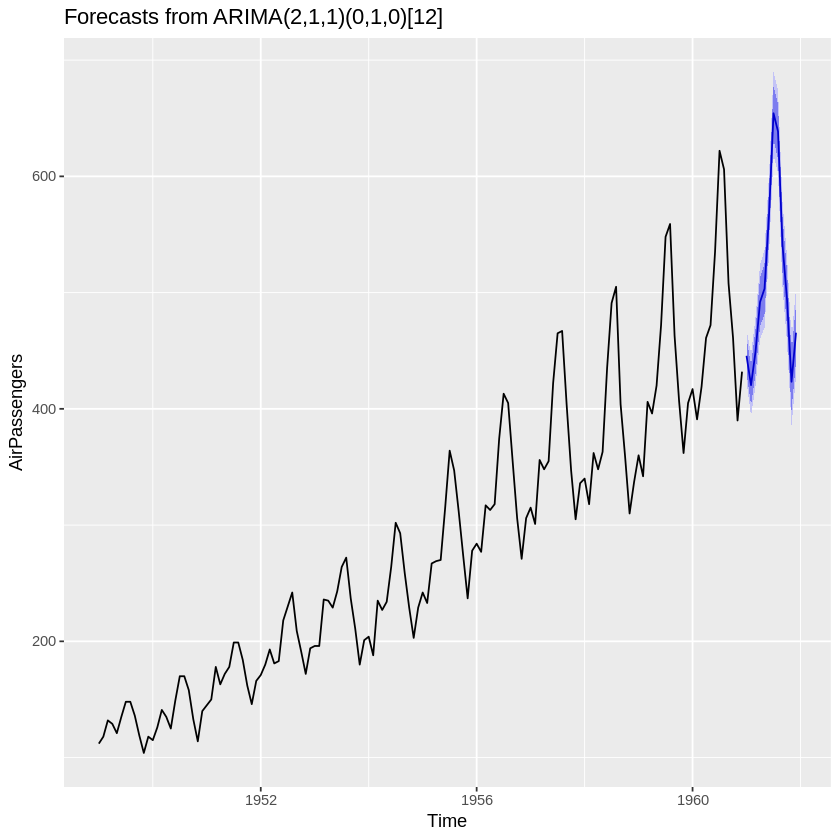

In [ ]:
arima_forecast <- arima_model %>% forecast(h=12)
autoplot(arima_forecast)

In [ ]:
model3 <- AirPassengers_ts %>% filter(Month == "July" | Month == "January") %>% summarise(Average = mean(Month))

In [ ]:
naive_model <- AirPassengers_ts %>% model(NAIVE(value)) %>% forecast(h=12)

In [ ]:
summary(holtwinter_model)
summary(holt_model)
summary(ses_model)
summary(arima_model)



Forecast method: ETS(A,A,A)

Model Information:
ETS(A,A,A) 

Call:
ets(y = AirPassengers, model = "AAA")

  Smoothing parameters:
    alpha = 0.9935 
    beta  = 2e-04 
    gamma = 6e-04 

  Initial states:
    l = 120.9608 
    b = 1.3934 
    s = -29.1816 -54.3842 -20.7169 15.0727 65.1554 66.1846
           33.5822 -4.232 -8.0946 -3.8205 -34.3364 -25.2288

  sigma:  18.0471

     AIC     AICc      BIC 
1565.872 1570.729 1616.359 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.9638247 17.01495 12.81203 0.3539818 5.224715 0.3999971 0.1875311

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       437.2863 414.1580 460.4145 401.9146 472.6579
Feb 1961       429.5850 396.9800 462.1899 379.7200 479.4500
Mar 1961       461.5371 421.6441 501.4302 400.5260 522.5483
Apr 1961       458.6587 412.6149 504.7025 388.2408 529.0766
May 1961       463.9389 412.4724 515.4055 385.2276 542.6503
Jun 1961      


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
holt(y = AirPassengers)

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 119.7517 
    b = 1.5963 

  sigma:  34.0125

     AIC     AICc      BIC 
1737.295 1737.729 1752.144 

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.5677345 33.53682 25.61104 -0.3624936 8.996892 0.7995878
                  ACF1
Training set 0.3024925

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       433.6004 390.0116 477.1892 366.9370 500.2638
Feb 1961       435.2049 373.5609 496.8488 340.9286 529.4811
Mar 1961       436.8093 361.3087 512.3099 321.3411 552.2775
Apr 1961       438.4138 351.2296 525.5980 305.0770 571.7505
May 1961       440.0182 342.5389 537.4975 290.9365 589.0999
Jun 1961       441.6227 334.8345 548.4109 278.3042 604.9411
Jul 1961       443.2271 327.8772 558.5770 266.8146 619.6396
Aug 1961    


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
ses(y = AirPassengers)

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 111.9892 

  sigma:  33.8299

     AIC     AICc      BIC 
1733.787 1733.958 1742.696 

Error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 2.22249 33.59418 25.68134 0.3758224 8.957112 0.8017825 0.3028609

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       431.9958 388.6410 475.3506 365.6904 498.3012
Feb 1961       431.9958 370.6859 493.3057 338.2304 525.7612
Mar 1961       431.9958 356.9081 507.0835 317.1591 546.8325
Apr 1961       431.9958 345.2927 518.6989 299.3949 564.5967
May 1961       431.9958 335.0593 528.9323 283.7442 580.2474
Jun 1961       431.9958 325.8075 538.1841 269.5948 594.3968
Jul 1961       431.9958 317.2996 546.6920 256.5831 607.4085
Aug 1961       431.9958 309.3806 554.6110 244.4721

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE     MASE         ACF1
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

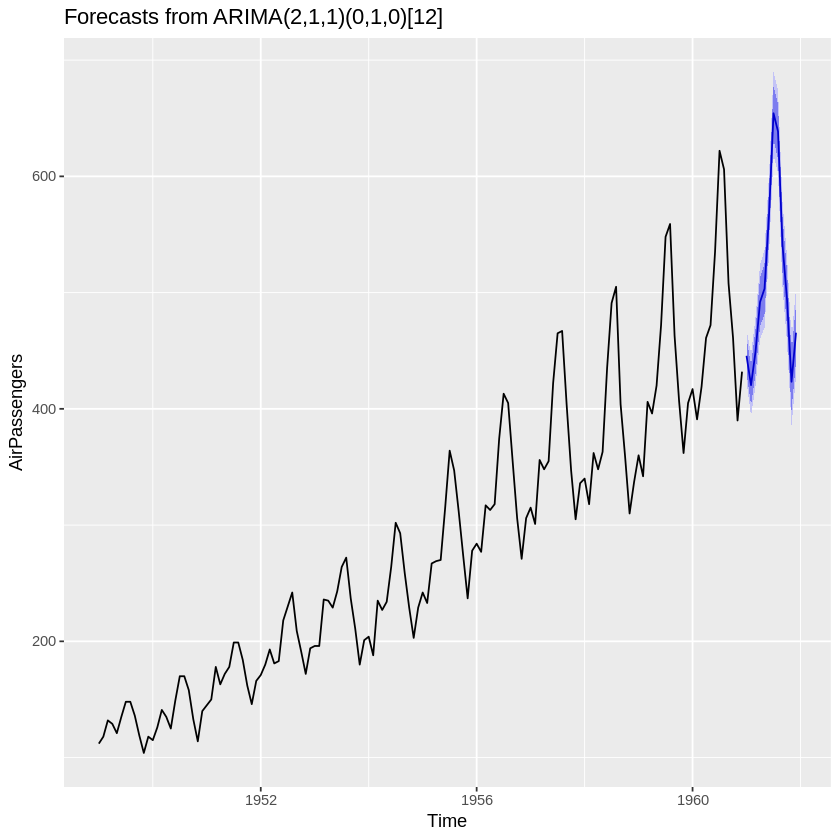

In [ ]:
arima_forecast1 <- arima_model %>% forecast(h=12)
autoplot(arima_forecast1)